In [0]:
# from google.colab import auth
# auth.authenticate_user()

# # # # https://cloud.google.com/resource-manager/docs/creating-managing-projects
# project_id = 'tsr-130997'
# !gcloud config set project {project_id}

In [0]:
# # Download the file from a given Google Cloud Storage bucket.
# #!gsutil cp gs://{bucket_name}/file_to_download.txt /tmp/gsutil_download.txt #exemplo

# !gsutil cp gs://preprocessed-traffic-sign-dataset/TrafficSignPreprocessed.zip /tmp/TrafficSignPreprocessed.zip


In [0]:
# import os
# import zipfile

# local_zip = '/tmp/TrafficSignPreprocessed.zip'  # Unzip nos arquivos carregados 
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

In [0]:
import pickle
import os
# Importing other standard libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from pylab import text
import csv
from PIL import Image
from skimage.transform import resize

In [37]:
base_dir = '/tmp/TrafficSignPreprocessed' 
data_fnames = os.listdir(base_dir)
data_fnames.sort()
print (data_fnames) 
print (data_fnames[3])
#load_rgb_data(data3.pickle)

['data0.pickle', 'data1.pickle', 'data2.pickle', 'data3.pickle', 'data4.pickle', 'data5.pickle', 'data6.pickle', 'data7.pickle', 'data8.pickle', 'datasets_preparing.py', 'label_names.csv', 'labels.pickle', 'mean_image_gray.pickle', 'mean_image_rgb.pickle', 'std_gray.pickle', 'std_rgb.pickle']
data3.pickle


In [38]:
#load_rgb_data('/tmp/TrafficSignPreprocessed/data0.pickle')

# # Getting mean and std
# # Opening file for reading in binary mode
with open('/tmp/TrafficSignPreprocessed/mean_image_rgb.pickle', 'rb') as f:
     mean_image_rgb = pickle.load(f, encoding='latin1')
    
with open('/tmp/TrafficSignPreprocessed/std_rgb.pickle', 'rb') as f:
     std_rgb = pickle.load(f, encoding='latin1')
    
with open('/tmp/TrafficSignPreprocessed/data3.pickle', 'rb') as f:
    data3 = pickle.load(f)

with open('/tmp/TrafficSignPreprocessed/data2.pickle', 'rb') as f:
    data2 = pickle.load(f)   
#print(data3)
d3 = data3['x_train']
print(d3.shape)

d2 = data3['x_train']
print(d2.shape)


(86989, 3, 32, 32)
(86989, 3, 32, 32)


In [0]:
y_train = data2['y_train']
y_val = data2['y_validation']
y_test = data2['y_test']

xv = data2['x_validation']
xt = data2['x_test']


In [0]:
# Alterar x_train de (x,3,32,32) para (x,32,32,3)
def reshape(A):
  B = np.einsum('klij->kijl', A)
  #print(B.shape)
  return B
  

In [0]:
x_train = reshape(d2)
x_val = reshape(xv)
x_test = reshape(xt)
#print(x_train.shape)

In [42]:
print(x_train.shape)

(86989, 32, 32, 3)


In [0]:
# # # Multiplying by std
# d2 = d3 * std_rgb['std_rgb']
# print(d2.shape)  # (86989, 3, 32, 32)

# # # Adding with mean
# d1 = d2 + mean_image_rgb['mean_image_rgb']
# print(d1.shape)  # (86989, 3, 32, 32)
# #
# # # Multiplying by 255.0
# d0 = d1 * 255.0
# print(d0.shape)  # (86989, 3, 32, 32)

# # # Showing result
# print('After Backward Calculation')
# #print(d0[0, 0, :, 0])
# #print(d3)

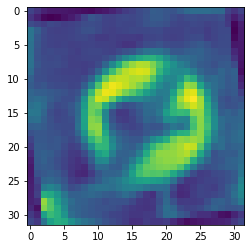

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

  #img = mpimg.imread(img_path)
plt.imshow(x_train[550,:,:,0]) # ver imagem preprocessada


In [45]:
with open('/tmp/TrafficSignPreprocessed/labels.pickle', 'rb') as f:
    y_label = pickle.load(f)

print(y_label)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


In [46]:
print(x_test.shape)

(12630, 32, 32, 3)


In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
# Our input feature map is 32x32x3: 32x32 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(32, 32, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3,activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
#x = layers.Conv2D(128, 3,activation='relu')(x)
#x = layers.MaxPooling2D(2)(x)

In [49]:
print(x.shape)

(?, 2, 2, 128)


In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and fostmax activation
output = layers.Dense(43, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [0]:
#model = tf.keras.backend.clear_session()

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0   

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              #optimizer=RMSprop(lr=0.001),
              optimizer='adam',
              metrics=['acc'])

In [54]:
print(x_train.shape)

(86989, 32, 32, 3)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#TREINAMENTO
y_train = tf.keras.utils.to_categorical(y_train, 43, dtype='float32') # sendo 43 o número de classes 

train_datagen = ImageDataGenerator(
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     horizontal_flip=True)

train_datagen.fit(x_train)

#VALIDAÇÃO
y_val = tf.keras.utils.to_categorical(y_val, 43, dtype='float32') # sendo 43 o número de classes 

val_datagen = ImageDataGenerator(
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     horizontal_flip=True)

val_datagen.fit(x_val)


train_generator = train_datagen.flow(x_train, y_train, batch_size=16)
val_generator = val_datagen.flow(x_val, y_val, batch_size=16)

# # fits the model on batches with real-time data augmentation:
# model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=16),
#                      steps_per_epoch=len(x_train) / 16, epochs=7)



In [0]:
#TESTE
y_test = tf.keras.utils.to_categorical(y_test, 43, dtype='float32') # sendo 43 o número de classes 

test_datagen = ImageDataGenerator(
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     horizontal_flip=True)

test_datagen.fit(x_val)


test_generator = test_datagen.flow(x_test, y_test, batch_size=16)

In [57]:
print(y_val.shape)

(4410, 43)


In [58]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(x_train) / 16, 
    epochs=12,
    validation_data = val_generator,
    #validation_steps = len(x_val)/16)
)
                   

Epoch 1/12
5437/5436 [==============================] - 126s 23ms/step - loss: 1.3384 - acc: 0.5775 - val_loss: 1.1516 - val_acc: 0.6660
Epoch 2/12
5437/5436 [==============================] - 125s 23ms/step - loss: 0.5198 - acc: 0.8277 - val_loss: 1.0481 - val_acc: 0.7306
Epoch 3/12
5437/5436 [==============================] - 126s 23ms/step - loss: 0.3937 - acc: 0.8733 - val_loss: 1.0675 - val_acc: 0.7590
Epoch 4/12
5437/5436 [==============================] - 126s 23ms/step - loss: 0.3361 - acc: 0.8908 - val_loss: 1.0201 - val_acc: 0.7683
Epoch 5/12
5437/5436 [==============================] - 127s 23ms/step - loss: 0.3055 - acc: 0.9015 - val_loss: 0.9937 - val_acc: 0.7785
Epoch 6/12
5437/5436 [==============================] - 127s 23ms/step - loss: 0.2812 - acc: 0.9106 - val_loss: 1.0215 - val_acc: 0.7882
Epoch 7/12
5437/5436 [==============================] - 127s 23ms/step - loss: 0.2712 - acc: 0.9151 - val_loss: 1.0465 - val_acc: 0.7982
Epoch 8/12
5437/5436 [===================

In [59]:
result = model.evaluate(x_test, y_test, batch_size=16)

12630/12630 [==============================] - 4s 355us/sample - loss: 3.6678 - acc: 0.4853


In [0]:
model.save('/model_v4.h5')

In [61]:
#print(y_train.shape)
# testpath = '/teste_tsr.png'
#model = tf.keras.models.load_model('/model_v1.h5')
# def prepare(filepath):
#     img_size = 32
#     img = cv2.imread(filepath, cv2.IMREAD_COLOR)/255
#     #print(img)
#     img_resize = cv2.resize(img, (img_size, img_size))
#     return new_array.reshape(-1, img_size, img_size, 1)
  
# prediction=model.predict(prepare(testpath))
# print(prediction)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#from scipy.misc #import imread, imresize
#im=cv2.imread('/teste_tsr.png', cv2.IMREAD_COLOR)
im=cv2.imread('/30.jpeg', cv2.IMREAD_COLOR)
#im=cv2.imread('/stop.png', cv2.IMREAD_COLOR)
#im=cv2.imread('/caution.webp', cv2.IMREAD_COLOR)
#im=cv2.imread('/desvio.jpg', cv2.IMREAD_COLOR)


im=im/255
im=cv2.resize(im,(32,32))
#im = reshape(im)
predict = model.predict(im.reshape(-1,32,32,3))

predict_value = np.amax(predict)
#predict_index = np.where(predict == predict_value)
predict_index = np.argmax(predict)
traffic_sign = y_label[predict_index]
print('Temos', predict_value*100, '% de certeza que essa placa é um', traffic_sign)
#print(predict)

TypeError: ignored

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)